<h3> SciPython/Practical_classes_5

Firstly, come back for a moment to Logistic Regression.

Exercise1: Open "logistic_regression" file that contains information about actual classes and predictions according to logistic regression model for subsequent observations.
    
- Calculate $S_n$ and $S_p$ values for 20 equally distant $p_c$ values from 0 to 1.
- Plot $ROC$ curve, mark a point with $p_c = 0.5$
- Calculate $AUC$.

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [154]:
data = pd.read_csv('logistic_regression.txt', sep = ',')
data.head()

,Observation,Class,Predicted_p
0,0,0,0.308
1,1,1,0.454
2,2,1,0.764
3,3,1,0.432
4,4,1,0.493


In [155]:
y_true = data["Class"]
y_pred_probs = data["Predicted_p"]

In [156]:
tps, fns, tns, fps = [], [], [], []
for pc in np.linspace(0, 1, 20):
    y_pred = (y_pred_probs >= pc).astype(int)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tps.append(tp)
    fns.append(fn)
    tns.append(tn)
    fps.append(fp)

In [157]:
sns = [tp / (tp + fn) for tp, fn in zip(tps, fns)]
sps = [tn / (tn + fp) for tn, fp in zip(tns, fps)]

In [158]:
print("p_c\tS_n\tS_p")
for pc, sn, sp in zip(np.linspace(0, 1, 20), sns, sps):
    print(f"{pc:.2f}\t{sn:.2f}\t{sp:.2f}")

p_c	S_n	S_p
0.00	1.00	0.00
0.05	1.00	0.07
0.11	1.00	0.15
0.16	1.00	0.25
0.21	1.00	0.34
0.26	1.00	0.42
0.32	1.00	0.52
0.37	1.00	0.62
0.42	0.95	0.73
0.47	0.88	0.81
0.53	0.80	0.89
0.58	0.72	0.97
0.63	0.63	1.00
0.68	0.55	1.00
0.74	0.45	1.00
0.79	0.36	1.00
0.84	0.26	1.00
0.89	0.17	1.00
0.95	0.08	1.00
1.00	0.00	1.00


In [171]:
x = np.array(sps)
y = np.array(sns)

In [172]:
x_new = 1-x

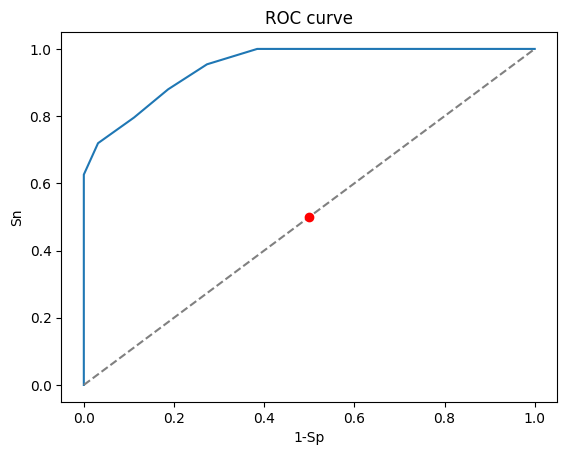

In [177]:
plt.plot(x_new, y)
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.plot([0.5], [0.5], marker="o", color="red")
  
plt.xlabel('1-Sp')

plt.ylabel('Sn')
  
plt.title('ROC curve')
  
plt.show()

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

area = trapz(y, x_new)
print("area =", -area) #there is a minus because trapz needs numbers in ascending order and there is descendin

area = 0.9483690422733979


Using in build models in python:

In [92]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
auc = roc_auc_score(y_true, y_pred_probs)

In [95]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
auc = roc_auc_score(y_true, y_pred_probs)

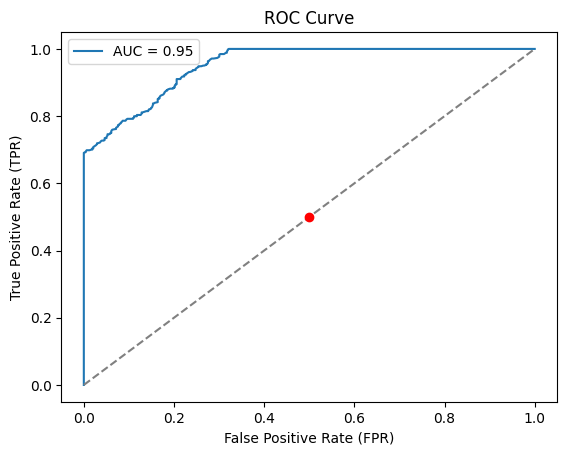

In [96]:
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.plot([0.5], [0.5], marker="o", color="red")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

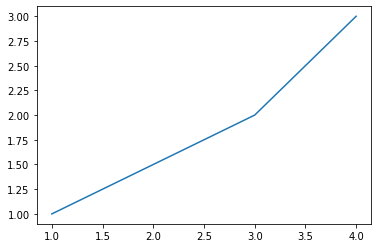

area = 5.5


In [311]:
#how to calculate the area under the curve?

import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

x = np.array([1,3,4])
y = np.array([1,2,3])

plt.plot(x,y)
plt.show()

area = trapz(y, x)
print("area =", area)

# Support vector machine (SVM)

In [33]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4> Linear (traditional) SVM

In general case, our aim is to find a hyperplane $g(x)= w^Tx+w_0=0$, where $w=[w_1,...,w_N]$ - vector of weights for every feature, $w_0$ is a bias that separates the classes. Additionally:
<br>

- $w^Tx_i + w_0 >0$ for $x_i \in Class_1$,
- $w^Tx_i + w_0 <0$ for $x_i \in Class_2$.

The distance between a point $x$ and hyperplane $g$ is given by $\frac{g(x)}{|w|}$. If we normalize the parameters, we may assume that the margin should equals $1$ which provides the conditions:
<br>

- $w^Tx_i + w_0 >1$ for $x_i \in Class_1$,
- $w^Tx_i + w_0 <1$ for $x_i \in Class_2$.

or simply 

- $d_i(w^Tx_i + w_0) >1$

where $d_i$ is the label of $x_i$ (for the first class $d_i=1$, for the second class $d_i = -1$). In general, such separation may be not possible, so we introduce some modifications to these condtions:

- $d_i(w^Tx_i + w_0) >1 - \eta_i$

where $\eta_i$ are additional variables. 
- if $\eta_i >0$, then we decrease the margin of separation
- if $\eta \in (0,1)$, then data point $x_i$ is still on correct side, but exceeded the margin,
- if $\eta >1$, then data point $x_i$ is on wrong side. 


In python, there is $C$ parameter which reflects the impact of $\eta_i$ parameters (regularization).

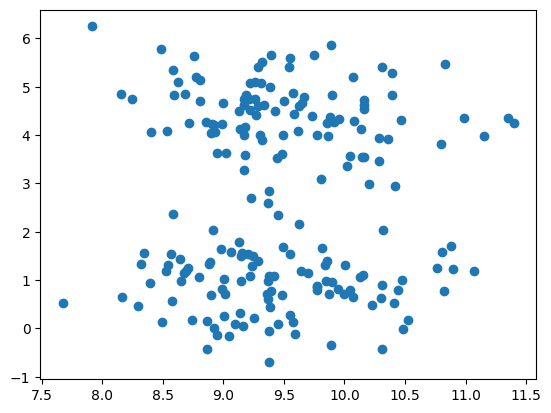

In [97]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=200, random_state=4,
                  n_features=2, centers = 2, 
                  cluster_std = 0.7) 

plt.scatter(X[:, 0], X[:, 1])
plt.show() 

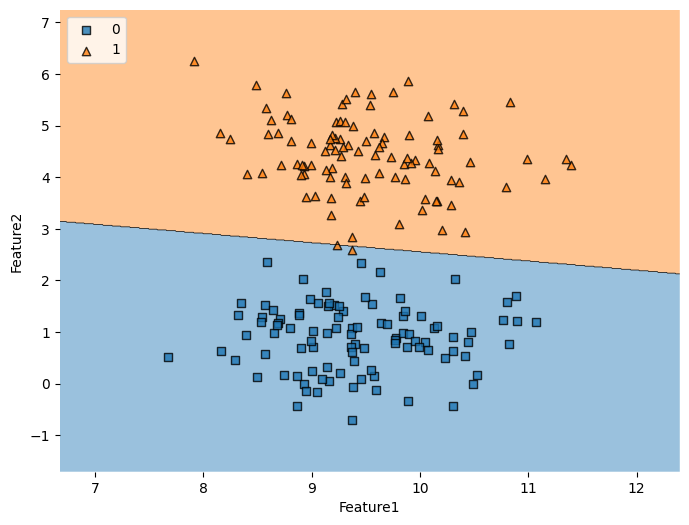

In [98]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, svm.predict(X))

array([[100,   0],
       [  2,  98]])

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



<h4> Exercise2: Consider the previous data. Apply the SVM algorithm for different parameters C: 0.01, 10. Visualize and comment on the obtained results. How low and high $C$ values impact the final classifier?

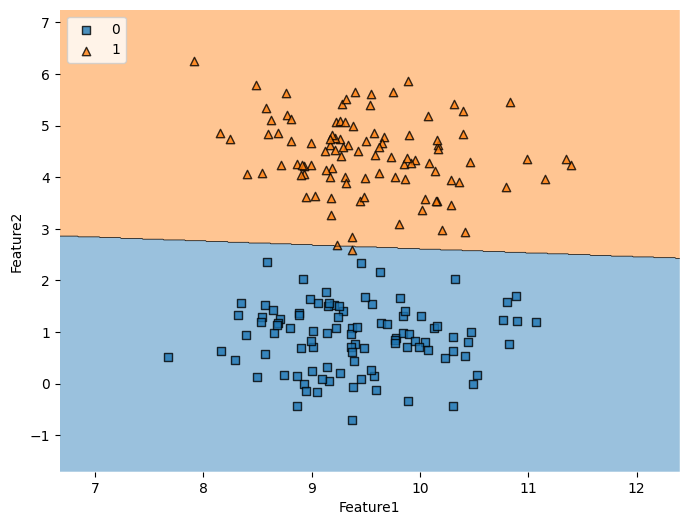

In [101]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

In [102]:
confusion_matrix(y, svm.predict(X))

array([[100,   0],
       [  1,  99]])

In [103]:
print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



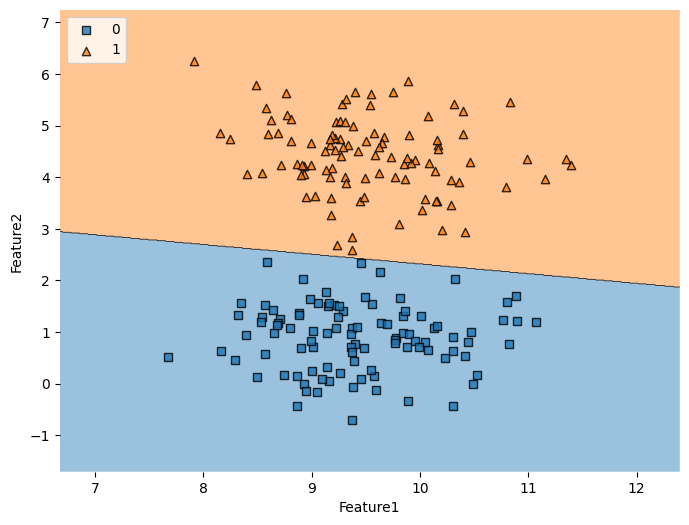

In [104]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

In [105]:
confusion_matrix(y, svm.predict(X))

array([[100,   0],
       [  0, 100]])

In [106]:
print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



It occured that the best $C$ parameter was C = 10. When $C$ is small, the SVM classifier will be more tolerant of errors in the training data, which can lead to a wider margin and better generalization performance on unseen data. However, if $C$ is too small, the classifier may become underfit and not capture the complexity of the data. On the other hand, when $C$ is large, the SVM classifier will try to minimize the training error as much as possible, which can lead to a smaller margin and potentially worse generalization performance on unseen data.

SVM may be used for more than two classes.

In [216]:
#iris data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

#trin/test spplit and standarization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [217]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train_std, y_train);

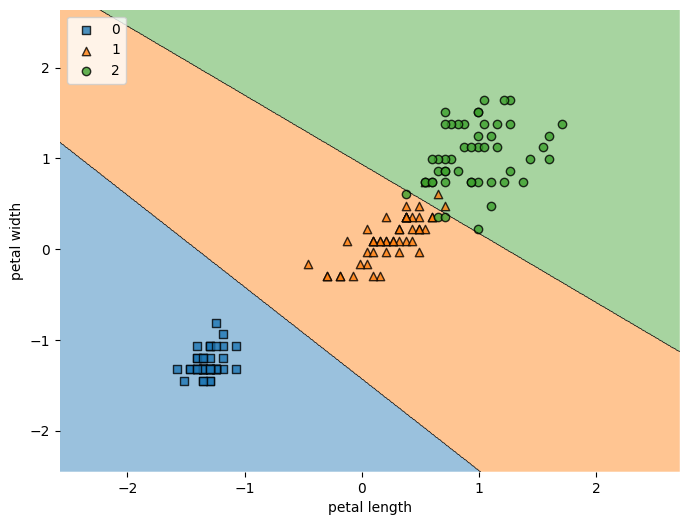

In [218]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [84]:
svm.score(X_test_std, y_test) #accuracy

0.9777777777777777

<h4> Exercise3: Open "spam_ham.txt" file. It contains spam/ham messages. Every line starts with the class and contains one message.
    
- Is data balanced?
- Split the data into training and test sets (8:2)
- Use TF-IDF method for transforming the text into vectors (numbers).
- Build 3 models, based on: SVM, NaiveBayes and Logistic regression approaches.
- Compare the recall/precision and f1-score for boths classes. Make a comment.
- Which model seems to be the most robust to unbalance?
- Propose example solutions how to deal with unbalanced data. Apply one of them to SVM, NaiveBayes and Logistic regression models.

In [250]:
with open('spam_ham.txt') as f:
    lines = f.readlines()
col_0 = []
col_1 = []
for line in lines:
    label, text = line.split('\t')
    col_0.append(label)
    col_1.append(text)

In [251]:
df = pd.DataFrame()
df['Label']  = col_0
df['Text'] = col_1

In [252]:
df = df.replace(['ham','spam'],[0, 1])
df

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...\n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?\n
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [253]:
X = df['Text']
y = df['Label']

In [254]:
unique_labels, counts = np.unique(df['Label'], return_counts=True)
proportions = counts / len(df['Label'])

print(proportions)

[0.86598493 0.13401507]


In [255]:
zeros = df['Label'].value_counts()[0]
ones = df['Label'].value_counts()[1]

In [256]:
zeros, ones

(4827, 747)

The data is strongly unbalanced, there is much more ham (0 values) than a spam (1 values).

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Naive Bayes

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer #method TF-IDF is an example how to convert the text into numbers
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB()) #we make a pipeline, 1. Text->numbers, 2. NB model
model1

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [259]:
model1.fit(X_train, y_train)
categories_predicted = model1.predict(X_test)

In [260]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       954
           1       1.00      0.72      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#SVM model

In [261]:
model2 = make_pipeline(TfidfVectorizer(), SVC()) #we make a pipeline, 1. Text->numbers, 2. SVC model
model2

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [262]:
model2.fit(X_train, y_train)
categories_predicted = model2.predict(X_test)

In [263]:
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.90      0.95       161

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#Logistic regression

In [264]:
model3 = make_pipeline(TfidfVectorizer(), LogisticRegression()) #we make a pipeline, 1. Text->numbers, 2. SVC model
model3

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [265]:
model3.fit(X_train, y_train)
categories_predicted = model3.predict(X_test)

In [266]:
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.99      0.81      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



- Precision/Specificity: how many selected instances are relevant.
- Recall/Sensitivity: how many relevant instances are selected.
- F1 score: harmonic mean of precision and recall.

We have low recall for class 1 (which have smaller number of observations) in Logistic Regression (0.81), for 1 in SVM (0.9) and for NB (0.72). The highest value for recall is for SVM model, which means it works the best for the unbalanced data.

Solutions for unbalanced data:
- Get rid of the data in excess (not so good)
- Resample the data that is insufficient
- Cluster the abundant class (Clustering the abundant class in r groups, with r being the number of cases in r. For each group, only the medoid (centre of cluster) is kept. The model is then trained with the rare class and the medoids only.)

In [235]:
sample_1 = np.random.choice(df['Label']==1, 4080)

In [238]:
class_0_count = df['Label'].value_counts()[0]
class_1_count = df['Label'].value_counts()[1]

# Calculate the number of samples to balance the data
balanced_count = class_0_count

# Create a balanced DataFrame by randomly sampling from the original DataFrame
df_balanced = pd.concat([
    df[df['Label'] == 0], # keep all samples with value 0
    df[df['Label'] == 1].sample(n=balanced_count, replace=True) # randomly sample n samples with value 1
])

# Verify the new class distribution
print(df_balanced['Label'].value_counts())

0    4827
1    4827
Name: Label, dtype: int64


In [241]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 4280
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   9654 non-null   int64 
 1   Text    9654 non-null   object
dtypes: int64(1), object(1)
memory usage: 226.3+ KB


In [243]:
X_bal = df_balanced['Text']
y_bal = df_balanced['Label']

In [245]:
from sklearn.model_selection import train_test_split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bal,y_bal, test_size = 0.2, random_state = 42)

In [270]:
models = [model1, model2, model3]
for i in range(len(models)):
    print(models[i])
    print(classification_report(yb_test, models[i].predict(Xb_test)))


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       991
           1       1.00      0.78      0.87       940

    accuracy                           0.89      1931
   macro avg       0.91      0.89      0.89      1931
weighted avg       0.91      0.89      0.89      1931

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       991
           1       1.00      0.96      0.98       940

    accuracy                           0.98      1931
   macro avg       0.98      0.98      0.98      1931
weighted avg       0.98      0.98      0.98      1931

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])
              precision    recall  f1-score  

In balanced data recalles are higher. The highest is still in SVM method. This method also has the highest precision and f1-score. Overall, SVMs can be a good choice for classification tasks where there are complex non-linear relationships between the features and the target variable, high-dimensional data or imbalanced data.

<h4> Kernel


Data is often not linearly separable, but linear classifiers can still work! Just apply the appropriate data transformation (kernel)


An example function, one of the most used is RBF, defined as $K(x,y) = -\exp(-\frac{1}{2\sigma^2} ||x-y||^2)= \exp( -\gamma ||x-y||^2)$

Other: polynomial, sigmoidal,...

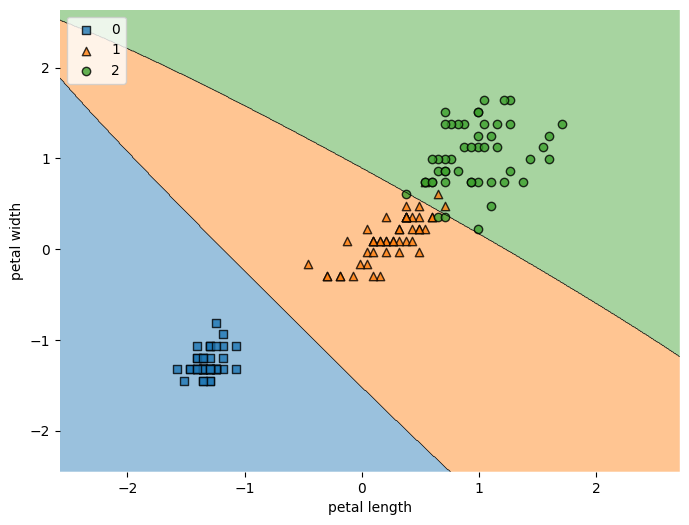

In [219]:
svm = SVC(kernel='rbf', C=1., gamma=0.1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

<h4> Exercise4: Try other $\gamma$ values ​​(e.g. 10, 50) for the data above. Comment the results in the context of the definition of the $\gamma$ parameter.

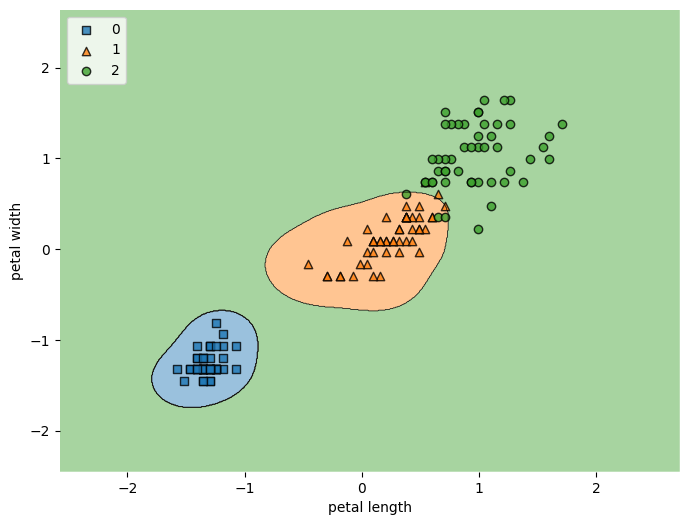

In [220]:
svm = SVC(kernel='rbf', C=1., gamma=10, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

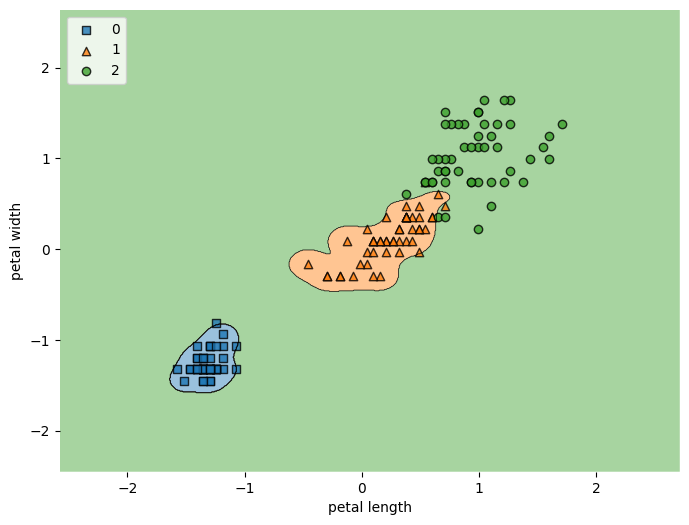

In [221]:
svm = SVC(kernel='rbf', C=1., gamma=50, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Gamma decides how much curvature we want in a decision boundary. High gamma means more curvature. Low gamma means less curvature. Looking at this graphs, high gamma (especially equal to 50) isn't a good option because it is very sensitive for even small errors (overfitting).

<h3> Face recognition


In [53]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names) #persons (whose faces we will analyze)
print()
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


Each photo is $62 \times $47, or $2914$ pixels. That's a lot... We will use PCA (there will be more about PCA in the future, for now it is enough to know that the effect will be a reduced number of variables)

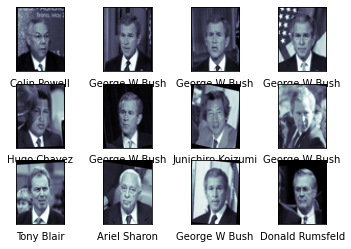

In [54]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])

In [55]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42) #we will reduce the number of features to 150
svc = SVC(kernel = "rbf", random_state = 0)
model = Pipeline([('pca', pca), ('svc',svc)])

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

param_grid = {"svc__C": [1, 5, 10, 50],
              "svc__gamma": [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid = grid.fit(X_train, y_train)

In [56]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [57]:
grid.score(X_test, y_test)

0.7654320987654321

In [58]:
m = grid.best_estimator_
yfit = m.predict(X_test)

In [59]:
m

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, gamma=0.005, random_state=0))])

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.71      0.77        17
     Colin Powell       0.85      0.79      0.81        84
  Donald Rumsfeld       0.69      0.56      0.62        36
    George W Bush       0.72      0.97      0.82       146
Gerhard Schroeder       0.72      0.64      0.68        28
      Hugo Chavez       0.80      0.30      0.43        27
Junichiro Koizumi       1.00      0.81      0.90        16
       Tony Blair       0.80      0.63      0.70        51

         accuracy                           0.77       405
        macro avg       0.80      0.67      0.72       405
     weighted avg       0.78      0.77      0.75       405



# Supplementary materials

<h3> Pipeline + Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1) #cv-cross validation

In [63]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
gs = gs.fit(X_train, y_train) 

In [64]:
print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

0.9527272727272728 {'clf__C': 0.1, 'clf__kernel': 'linear'} 0.9555555555555556
